## Практика 9


### Задание 1. Выгрузка данных, предобработка, и вывод списка уникальных регионов

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [71]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [73]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [74]:
regions = np.array(data.region.unique())
print(regions)

['southwest' 'southeast' 'northwest' 'northeast']


### Задание 2. Однофакторный ANOVA тест через библиотеку Scipy

In [75]:
groups = data.groupby("region").groups

southwest = data.bmi[groups["southwest"]]
southeast = data.bmi[groups["southeast"]]
northwest = data.bmi[groups["northwest"]]
northeast = data.bmi[groups["northeast"]]

stats.f_oneway(southwest, southeast, northwest, northeast)

F_onewayResult(statistic=39.48593864487439, pvalue=1.9087293927440606e-24)

### Задание 3. Однофакторный ANOVA тест, с помощью функции anova_lm() из библиотеки statsmodels

In [76]:
model = smf.ols('bmi ~ region', data).fit()
print(sm.stats.anova_lm(model, typ = 2))

                sum_sq      df          F        PR(>F)
region     4057.813904     3.0  39.485939  1.908729e-24
Residual  45662.381091  1333.0        NaN           NaN


### Задание 4. t-критерий Стьюдента. Поправка Бонферрони

In [77]:
region_pairs = []

for region1 in range(3):
    for region2 in range(region1 + 1, 4):
        region_pairs.append((regions[region1], regions[region2]))

for region1, region2 in region_pairs:
    print(region1, region2)
    t_res = stats.ttest_ind(data.bmi[groups[region1]], data.bmi[groups[region2]])
    print(t_res)

southwest southeast
Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
southwest northwest
Ttest_indResult(statistic=3.289593460501664, pvalue=0.0010577505931067947)
southwest northeast
Ttest_indResult(statistic=3.1169000930045923, pvalue=0.0019086161671573074)
southeast northwest
Ttest_indResult(statistic=9.252137489219615, pvalue=2.7504255547794223e-19)
southeast northeast
Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)
northwest northeast
Ttest_indResult(statistic=0.05038637314068614, pvalue=0.9598300701853016)


### Задание 5. Пост-хок тесты Тьюки и построение графика

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.022,1.0,-1.1608,1.2048,False
northeast,southeast,4.1825,0.0,3.0326,5.3324,True
northeast,southwest,1.4231,0.0107,0.2412,2.605,True
northwest,southeast,4.1605,0.0,3.0106,5.3104,True
northwest,southwest,1.4011,0.0125,0.2192,2.583,True
southeast,southwest,-2.7594,0.0,-3.9083,-1.6104,True


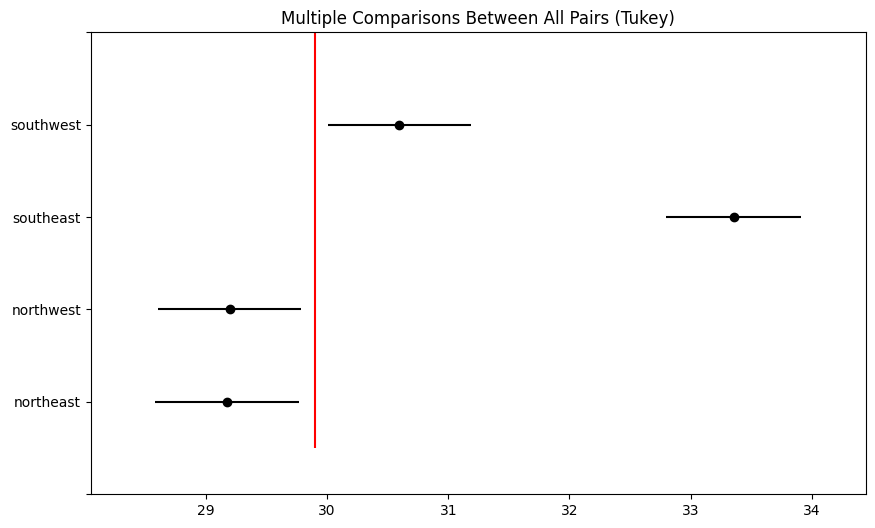

In [78]:
tukey = pairwise_tukeyhsd(endog = data.bmi, groups=data.region)
tukey.plot_simultaneous()
plt.vlines(x = 29.9, ymin = -0.5, ymax = 4.5, color = "red")
tukey.summary()

### Задание 6. Двухфакторный ANOVA тест, используя функцию anova_lm()

In [79]:
model = smf.ols('bmi ~ C(sex) + C(region) + C(sex):C(region)', data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(sex),85.359929,1.0,2.498643,1.141824e-01
C(region),4036.141807,3.0,39.381780,2.215903e-24
C(sex):C(region),175.040197,3.0,1.707917,1.635099e-01
Residual,45401.980965,1329.0,NaN,NaN


### Задание 7. Пост-хок тесты Тьюки и построение графика

group1,group2,meandiff,p-adj,lower,upper,reject
female / northeast,female / northwest,-0.0464,1.0,-2.0149,1.9222,False
female / northeast,female / southeast,3.3469,0.0,1.4093,5.2846,True
female / northeast,female / southwest,0.7362,0.9498,-1.2384,2.7107,False
female / northeast,male / northeast,-0.2998,0.9998,-2.2713,1.6718,False
female / northeast,male / northwest,-0.2133,1.0,-2.194,1.7674,False
female / northeast,male / southeast,4.6657,0.0,2.7627,6.5686,True
female / northeast,male / southwest,1.8051,0.101,-0.1664,3.7767,False
female / northwest,female / southeast,3.3933,0.0,1.4649,5.3217,True
female / northwest,female / southwest,0.7825,0.9295,-1.1829,2.748,False
female / northwest,male / northeast,-0.2534,0.9999,-2.2159,1.709,False


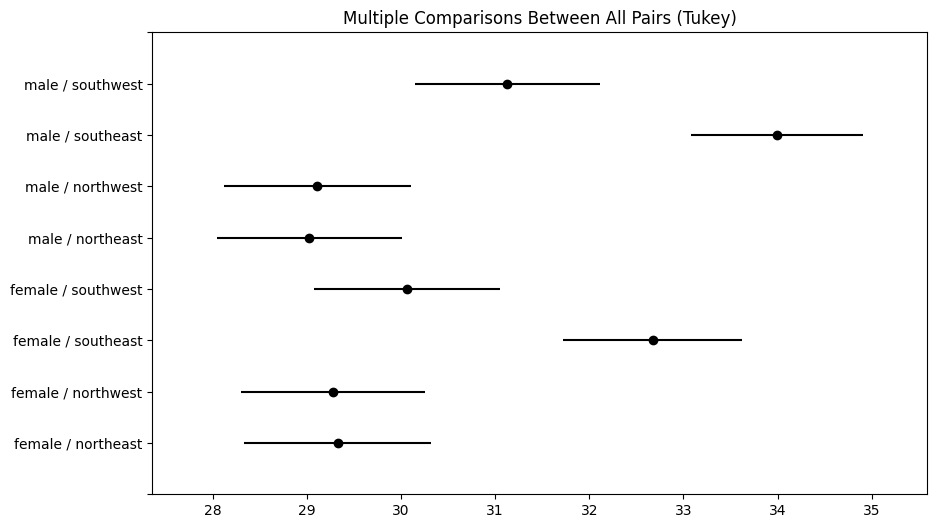

In [80]:
data['combination'] = data.sex + " / " + data.region

tukey = pairwise_tukeyhsd(endog=data.bmi, groups=data.combination)
tukey.plot_simultaneous()
tukey.summary()